## 導入套件

In [1]:
#!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import tensorflow
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
#pd.set_option('display.max_rows', None)

df=pd.read_csv('0412_9.5萬全表.csv')
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0


# 實驗區

In [3]:
df.t_dat = pd.to_datetime(df.t_dat) #增加月份欄位分季節
df['Month'] = df['t_dat'].dt.month.astype('int32')
df['Year'] = df['t_dat'].dt.year.astype('int32')
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0,6,2019
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0,8,2020
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0,2,2020
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0,1,2019
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0,9,2019
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0,1,2020
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0,8,2019
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0,11,2019


In [4]:
Month_class=[] #判斷填入季節
for i in df['Month']:
    if i==3 or i==4 or i==5:
        Month_class.append('Spring')
    elif i==6 or i==7 or i==8:
        Month_class.append('Summer')
    elif i==9 or i==10 or i==11:
        Month_class.append('Fall')
    elif i==12 or i==1 or i==2:
        Month_class.append('Winter')

In [5]:
Seasonlabel=pd.DataFrame(Month_class)
Seasonlabel.columns=['season']
Seasonlabel

,season
0,Summer
1,Summer
2,Winter
3,Winter
4,Spring
...,...
95079,Fall
95080,Winter
95081,Summer
95082,Fall


In [6]:
df['season']=Seasonlabel['season'] #增加欄位
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0,6,2019,Summer
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0,8,2020,Summer
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0,2,2020,Winter
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0,1,2019,Winter
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0,4,2019,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0,9,2019,Fall
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0,1,2020,Winter
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0,8,2019,Summer
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0,11,2019,Fall


In [7]:
age_class=[]
age_ = df['age'].isnull()*1
for i in range(len(age_)):
    if age_[i] != 0:
        age_class.append(0)
    else:
        if df['age'][i] <= 25:
            age_class.append("1")
        elif df['age'][i] > 25 and df['age'][i] <= 35:
            age_class.append("2")    
        elif df['age'][i] > 35 and df['age'][i] <= 45:
            age_class.append("3")
        elif df['age'][i] > 45 and df['age'][i] <= 55:
            age_class.append("4")
        elif df['age'][i] > 55:
            age_class.append("5")

In [8]:
agec=pd.DataFrame(age_class)
agec.columns=['agelabel']
agec

,agelabel
0,1
1,3
2,1
3,2
4,2
...,...
95079,2
95080,2
95081,2
95082,1


In [9]:
df['agelabel']=agec['agelabel']

In [10]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0,6,2019,Summer,1
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0,8,2020,Summer,3
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0,2,2020,Winter,1
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0,1,2019,Winter,2
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0,4,2019,Spring,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0,9,2019,Fall,2
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0,8,2019,Summer,2
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0,11,2019,Fall,1


In [11]:
df['pricetest']=round(df['price']*10000)
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0


In [12]:
df['pricetest'].max(),df['pricetest'].median(),df['pricetest'].min()

(1678.0, 244.0, 3.0)

In [13]:
# df_price01=df['price'][df['price']<0.0243728813559322]
# df_price01.median()

In [14]:
# df_price02=df['price'][df['price']<0.016457627118644]
# df_price02.median()

In [15]:
# df_price03=df['price'][df['price']>=0.0243728813559322]
# df_price03.median()

In [16]:
#得到最小值0.000322033898305到0.0112881355932203為一區間
#得到最小值0.0112881355932203到0.016457627118644為一區間
#得到最小值0.016457627118644到0.0243728813559322為一區間
#得到中間值0.0243728813559322到0.0338813559322033為一區間
#得到最大值0.0338813559322033到0.1677966101694915為一區間


In [17]:
price_class=[]
price_ = df['pricetest'].isnull()*1
for i in range(len(price_)):
#     if price_[i] == 0:
#         price_class.append(0)
#     else:
#         if df['price'][i] <= 0.0112881355932203:
#             price_class.append("低價")
#         elif df['price'][i] > 0.0112881355932203 and df['price'][i] <= 0.016457627118644:
#             price_class.append("中低價")    
#         elif df['price'][i] > 0.016457627118644 and df['price'][i] <= 0.0243728813559322: 
#             price_class.append("平價")   
#         elif df['price'][i] > 0.0243728813559322 and df['price'][i] <= 0.0338813559322033: 
#             price_class.append("中高價")   
#         elif df['price'][i] > 0.0338813559322033:
#             price_class.append("高價") 
            
        if df['pricetest'][i] <= 99:
            price_class.append("99元以下")
        elif df['pricetest'][i] > 99 and df['pricetest'][i] <= 199:
            price_class.append("100~199元")
        elif df['pricetest'][i] > 199 and df['pricetest'][i] <= 299:
            price_class.append("200~299元")
        elif df['pricetest'][i] > 299 and df['pricetest'][i] <= 399: 
            price_class.append("300~399元")   
        elif df['pricetest'][i] > 399 and df['pricetest'][i] <= 499: 
            price_class.append("400~499元")
        elif df['pricetest'][i] > 499 and df['pricetest'][i] <= 599: 
            price_class.append("500~599元")   
        elif df['pricetest'][i] > 599 and df['pricetest'][i] <= 699:
            price_class.append("600~699元")
        elif df['pricetest'][i] > 699 and df['pricetest'][i] <= 799:
            price_class.append("700~799元")
        elif df['pricetest'][i] > 799 and df['pricetest'][i] <= 899: 
            price_class.append("800~899元")   
        elif df['pricetest'][i] > 899 and df['pricetest'][i] <= 999: 
            price_class.append("900元~999元")   
        elif df['pricetest'][i] > 999:
            price_class.append("1000元以上")   

In [18]:
pricelabel=pd.DataFrame(price_class)
pricelabel.columns=['pricelabel']
pricelabel

,pricelabel
0,99元以下
1,400~499元
2,300~399元
3,800~899元
4,200~299元
...,...
95079,300~399元
95080,99元以下
95081,100~199元
95082,500~599元


In [19]:
pricelabel.value_counts()

pricelabel
100~199元      28468
200~299元      26682
300~399元      17951
99元以下          9432
400~499元       6250
500~599元       4472
600~699元       1022
800~899元        475
1000元以上         182
700~799元        105
900元~999元        45
dtype: int64

In [20]:
df['pricelabel']=pricelabel['pricelabel']
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元


In [21]:
df_fnac=df['FN']+df['Active']>=2
a=pd.DataFrame(df_fnac)
a.columns=['b']
a

,b
0,True
1,False
2,True
3,False
4,False
...,...
95079,False
95080,False
95081,False
95082,False


In [22]:
df['組裝狀態']=a['b']

In [23]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel,組裝狀態
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1.0,1.0,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下,True
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0.0,0.0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元,False
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1.0,1.0,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元,True
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0.0,0.0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元,False
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0.0,0.0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0.0,0.0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元,False
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1.0,0.0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下,False
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0.0,0.0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元,False
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0.0,0.0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元,False


In [24]:
df['組裝狀態']=df['組裝狀態'].astype('str')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95084 entries, 0 to 95083
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   t_dat                         95084 non-null  datetime64[ns]
 1   customer_id                   95084 non-null  object        
 2   article_id                    95084 non-null  int64         
 3   price                         95084 non-null  float64       
 4   sales_channel_id              95084 non-null  int64         
 5   prod_name                     95084 non-null  object        
 6   product_group_name            95084 non-null  object        
 7   graphical_appearance_name     95084 non-null  object        
 8   colour_group_name             95084 non-null  object        
 9   perceived_colour_value_name   95084 non-null  object        
 10  perceived_colour_master_name  95084 non-null  object        
 11  department_name             

In [26]:
df['FN']=df['FN'].astype('int32')
df['Active']=df['Active'].astype('int32')

df['FN']=df['FN'].astype('str')
df['Active']=df['Active'].astype('str')
#df['fashion_news_frequency']+df['FN']+df['Active']

df.insert(29, column="潮爆",value=df['fashion_news_frequency']+df['FN']+df['Active'])

In [27]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel,組裝狀態,潮爆
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下,True,REGULARLY11
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0,0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元,False,NONE00
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1,1,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元,True,REGULARLY11
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0,0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元,False,NONE00
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0,0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元,False,NONE00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0,0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元,False,NONE00
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1,0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下,False,REGULARLY10
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0,0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元,False,NONE00
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0,0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元,False,NONE00


In [28]:
df['是否很潮']=df['潮爆'] == 'REGULARLY11'

In [29]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel,組裝狀態,潮爆,是否很潮
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下,True,REGULARLY11,True
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0,0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元,False,NONE00,False
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1,1,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元,True,REGULARLY11,True
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0,0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元,False,NONE00,False
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0,0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元,False,NONE00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0,0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元,False,NONE00,False
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1,0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下,False,REGULARLY10,False
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0,0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元,False,NONE00,False
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0,0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元,False,NONE00,False


In [30]:
df['club_member_status'].value_counts()

ACTIVE        94612
PRE-CREATE      459
LEFT CLUB        13
Name: club_member_status, dtype: int64

In [31]:
df.insert(30, column="忠實顧客",value=df['club_member_status']+df['FN']+df['Active']+df['fashion_news_frequency'])

In [32]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel,組裝狀態,潮爆,忠實顧客,是否很潮
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下,True,REGULARLY11,ACTIVE11REGULARLY,True
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0,0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元,False,NONE00,ACTIVE00NONE,False
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1,1,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元,True,REGULARLY11,ACTIVE11REGULARLY,True
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0,0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元,False,NONE00,ACTIVE00NONE,False
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0,0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元,False,NONE00,ACTIVE00NONE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0,0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元,False,NONE00,ACTIVE00NONE,False
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1,0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下,False,REGULARLY10,ACTIVE10REGULARLY,False
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0,0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元,False,NONE00,ACTIVE00NONE,False
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0,0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元,False,NONE00,ACTIVE00NONE,False


In [33]:
df['是否忠實顧客']=df['忠實顧客'] == 'ACTIVE11REGULARLY'

In [34]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel,組裝狀態,潮爆,忠實顧客,是否很潮,是否忠實顧客
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下,True,REGULARLY11,ACTIVE11REGULARLY,True,True
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0,0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元,False,NONE00,ACTIVE00NONE,False,False
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1,1,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元,True,REGULARLY11,ACTIVE11REGULARLY,True,True
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0,0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元,False,NONE00,ACTIVE00NONE,False,False
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0,0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元,False,NONE00,ACTIVE00NONE,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0,0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元,False,NONE00,ACTIVE00NONE,False,False
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1,0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下,False,REGULARLY10,ACTIVE10REGULARLY,False,False
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0,0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元,False,NONE00,ACTIVE00NONE,False,False
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0,0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元,False,NONE00,ACTIVE00NONE,False,False


In [35]:
df['是否很潮']=df['是否很潮'].astype('str')
df['是否忠實顧客']=df['是否忠實顧客'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95084 entries, 0 to 95083
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   t_dat                         95084 non-null  datetime64[ns]
 1   customer_id                   95084 non-null  object        
 2   article_id                    95084 non-null  int64         
 3   price                         95084 non-null  float64       
 4   sales_channel_id              95084 non-null  int64         
 5   prod_name                     95084 non-null  object        
 6   product_group_name            95084 non-null  object        
 7   graphical_appearance_name     95084 non-null  object        
 8   colour_group_name             95084 non-null  object        
 9   perceived_colour_value_name   95084 non-null  object        
 10  perceived_colour_master_name  95084 non-null  object        
 11  department_name             

In [36]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricetest,pricelabel,組裝狀態,潮爆,忠實顧客,是否很潮,是否忠實顧客
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,94.0,99元以下,True,REGULARLY11,ACTIVE11REGULARLY,True,True
1,2020-08-30,7251bc97594c0cbdf5ee789b8a059b28f9ab208e0681fd...,730683050,0.042356,2,HAVANA HW tights,Unknown,Mesh,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy,Sports tights in fast-drying functional fabric...,0,0,ACTIVE,NONE,45.0,8,2020,Summer,3,424.0,400~499元,False,NONE00,ACTIVE00NONE,False,False
2,2020-02-14,de625d7976faf53a1390f5f414b14cd7004171fdd8ab3f...,448509027,0.038119,2,Perrie Slim Mom Denim TRS,Garment Lower body,Solid,Dark Grey,Dark,Grey,Trousers,Divided,Divided,Divided Collection,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",1,1,ACTIVE,REGULARLY,22.0,2,2020,Winter,1,381.0,300~399元,True,REGULARLY11,ACTIVE11REGULARLY,True,True
3,2019-01-24,54b86437f6ee97e12d813f23d2308c680281a9fa2174b0...,399136009,0.084729,2,Shaping Skinny R.W.,Garment Lower body,Solid,Black,Dark,Black,Denim Trousers,Divided,Divided,Ladies Denim,Trousers Denim,Shaping. 5-pocket jeans in washed denim with t...,0,0,ACTIVE,NONE,33.0,1,2019,Winter,2,847.0,800~899元,False,NONE00,ACTIVE00NONE,False,False
4,2019-04-05,b4ebcee2066af46306df857b429c3e5dbd6f0f40cecac8...,765657003,0.025407,2,Sandy,Garment Lower body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"Jersey trousers with a regular, elasticated wa...",0,0,ACTIVE,NONE,26.0,4,2019,Spring,2,254.0,200~299元,False,NONE00,ACTIVE00NONE,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-02,62854fdbc870e53af62f539c5e4db6fbc9a195cb20aa22...,752814004,0.033881,2,Milk RW slack,Garment Lower body,Check,Yellowish Brown,Dark,Brown,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Cigarette trousers in stretch twill with a reg...,0,0,ACTIVE,NONE,34.0,9,2019,Fall,2,339.0,300~399元,False,NONE00,ACTIVE00NONE,False,False
95080,2020-01-23,19666586b07577e131a4d1f10898ac88e2a4d550d7c474...,373506004,0.005068,1,Trainer 3p sock,Socks & Tights,Solid,White,Light,White,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit liner socks designed to be hidden in...,1,0,ACTIVE,REGULARLY,28.0,1,2020,Winter,2,51.0,99元以下,False,REGULARLY10,ACTIVE10REGULARLY,False,False
95081,2019-08-16,501eca1f99e2cdb31d3e2d76a0870a5173e8e4659a8d2e...,554598047,0.012153,1,Nora T-shirt,Garment Upper body,Solid,Dark Blue,Dark,Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,"T-shirt in soft jersey with a round neck, shor...",0,0,ACTIVE,NONE,28.0,8,2019,Summer,2,122.0,100~199元,False,NONE00,ACTIVE00NONE,False,False
95082,2019-11-10,e5aa67228f3dba3f4c917240f5706157369a0b3554f109...,744073001,0.050831,2,Ariel playsuit,Garment Lower body,All over pattern,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"Playsuit in an airy, patterned viscose weave w...",0,0,ACTIVE,NONE,24.0,11,2019,Fall,1,508.0,500~599元,False,NONE00,ACTIVE00NONE,False,False


In [37]:
df=df.drop('潮爆',axis=1)
df=df.drop('忠實顧客',axis=1)

In [38]:
df=df.drop('pricetest',axis=1)

In [39]:
#增加熱銷品、一班品、冷門品

In [40]:
df1=pd.DataFrame(df['article_id'].value_counts())
df1['銷售數量']=df1['article_id']
df1

,article_id,銷售數量
790096001,101,101
716348001,101,101
827968004,101,101
700701001,101,101
568597007,101,101
...,...,...
717664004,39,39
739819010,39,39
811835003,39,39
861410003,39,39


In [41]:
df1=df1.drop('article_id',axis=1)

In [42]:
df1['article_id']=df1.index

In [43]:
df1

,銷售數量,article_id
790096001,101,790096001
716348001,101,716348001
827968004,101,827968004
700701001,101,700701001
568597007,101,568597007
...,...,...
717664004,39,717664004
739819010,39,739819010
811835003,39,811835003
861410003,39,861410003


In [44]:
df2=pd.merge(df,df1,on='article_id')
df2

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricelabel,組裝狀態,是否很潮,是否忠實顧客,銷售數量
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,99元以下,True,True,True,45
1,2019-03-03,ee6ee34d6b76cfdf0c5fd16d3664efcf8468552e84a0bd...,708379003,0.013542,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,58.0,3,2019,Spring,5,100~199元,True,True,True,45
2,2019-06-24,8bb014aa228937d1f8b5d5cb8d29a9589f6705fbaa1a05...,708379003,0.009000,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,23.0,6,2019,Summer,1,99元以下,True,True,True,45
3,2019-06-19,993b24c931de03fe63d888ef92448bdf1929669d2e12b0...,708379003,0.008678,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,28.0,6,2019,Summer,2,99元以下,True,True,True,45
4,2019-04-09,741e336abcbe63183da605cddf2c673ebb92c345f546ab...,708379003,0.016932,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,49.0,4,2019,Spring,4,100~199元,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-26,1e1a70d833490b113b8a663080601babb09577eabcf12d...,733099001,0.016932,2,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,1,1,ACTIVE,REGULARLY,67.0,9,2019,Fall,5,100~199元,True,True,True,39
95080,2019-09-28,d2a68aa7d90ae88d9952886ed382ebc3b32cf89dfabdc7...,733099001,0.013542,2,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,51.0,9,2019,Fall,4,100~199元,False,False,False,39
95081,2019-12-24,407ac5287bbaa89979b1b52db3b1be2c8ed6904bf3daca...,733099001,0.011542,1,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,25.0,12,2019,Winter,1,100~199元,False,False,False,39
95082,2019-09-21,6abd572f47e180783c632bb0e711bbcaff8b9165469821...,733099001,0.016932,1,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,65.0,9,2019,Fall,5,100~199元,False,False,False,39


In [45]:
df2['銷售數量'].max(),df2['銷售數量'].median(),df2['銷售數量'].min()

(101, 55.0, 39)

In [46]:
df3=df2['銷售數量'][df2['銷售數量']<55]
df3.median()

47.0

In [47]:
df4=df2['銷售數量'][df2['銷售數量']>=55]
df4.median()

67.0

In [48]:
sale_class=[]
sale_ = df2['銷售數量'].isnull()*1
for i in range(len(sale_)):    
        if df2['銷售數量'][i] <= 47:
            sale_class.append("冷門")
        elif df2['銷售數量'][i] > 47 and df2['銷售數量'][i] <= 67:
            sale_class.append("一般")
        elif df2['銷售數量'][i] > 67:
            sale_class.append("熱門")
      

In [49]:
df5=pd.DataFrame(sale_class)
df5.columns=['salelabel']
df5

,salelabel
0,冷門
1,冷門
2,冷門
3,冷門
4,冷門
...,...
95079,冷門
95080,冷門
95081,冷門
95082,冷門


In [50]:
df2['salelabel']=df5['salelabel']

In [51]:
df2

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricelabel,組裝狀態,是否很潮,是否忠實顧客,銷售數量,salelabel
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,99元以下,True,True,True,45,冷門
1,2019-03-03,ee6ee34d6b76cfdf0c5fd16d3664efcf8468552e84a0bd...,708379003,0.013542,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,58.0,3,2019,Spring,5,100~199元,True,True,True,45,冷門
2,2019-06-24,8bb014aa228937d1f8b5d5cb8d29a9589f6705fbaa1a05...,708379003,0.009000,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,23.0,6,2019,Summer,1,99元以下,True,True,True,45,冷門
3,2019-06-19,993b24c931de03fe63d888ef92448bdf1929669d2e12b0...,708379003,0.008678,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,28.0,6,2019,Summer,2,99元以下,True,True,True,45,冷門
4,2019-04-09,741e336abcbe63183da605cddf2c673ebb92c345f546ab...,708379003,0.016932,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,49.0,4,2019,Spring,4,100~199元,True,True,True,45,冷門
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-26,1e1a70d833490b113b8a663080601babb09577eabcf12d...,733099001,0.016932,2,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,1,1,ACTIVE,REGULARLY,67.0,9,2019,Fall,5,100~199元,True,True,True,39,冷門
95080,2019-09-28,d2a68aa7d90ae88d9952886ed382ebc3b32cf89dfabdc7...,733099001,0.013542,2,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,51.0,9,2019,Fall,4,100~199元,False,False,False,39,冷門
95081,2019-12-24,407ac5287bbaa89979b1b52db3b1be2c8ed6904bf3daca...,733099001,0.011542,1,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,25.0,12,2019,Winter,1,100~199元,False,False,False,39,冷門
95082,2019-09-21,6abd572f47e180783c632bb0e711bbcaff8b9165469821...,733099001,0.016932,1,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,65.0,9,2019,Fall,5,100~199元,False,False,False,39,冷門


In [52]:
df2=df2.drop('銷售數量',axis=1)

In [53]:
df2

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricelabel,組裝狀態,是否很潮,是否忠實顧客,salelabel
0,2019-06-24,7c1daa269f8aad0f35430c8247e7808cbaee38d2a15ecc...,708379003,0.009356,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,24.0,6,2019,Summer,1,99元以下,True,True,True,冷門
1,2019-03-03,ee6ee34d6b76cfdf0c5fd16d3664efcf8468552e84a0bd...,708379003,0.013542,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,58.0,3,2019,Spring,5,100~199元,True,True,True,冷門
2,2019-06-24,8bb014aa228937d1f8b5d5cb8d29a9589f6705fbaa1a05...,708379003,0.009000,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,23.0,6,2019,Summer,1,99元以下,True,True,True,冷門
3,2019-06-19,993b24c931de03fe63d888ef92448bdf1929669d2e12b0...,708379003,0.008678,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,28.0,6,2019,Summer,2,99元以下,True,True,True,冷門
4,2019-04-09,741e336abcbe63183da605cddf2c673ebb92c345f546ab...,708379003,0.016932,2,Simone,Garment Upper body,Solid,Light Beige,Dusty Light,Beige,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Fitted top in ribbed jersey made from an organ...,1,1,ACTIVE,REGULARLY,49.0,4,2019,Spring,4,100~199元,True,True,True,冷門
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95079,2019-09-26,1e1a70d833490b113b8a663080601babb09577eabcf12d...,733099001,0.016932,2,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,1,1,ACTIVE,REGULARLY,67.0,9,2019,Fall,5,100~199元,True,True,True,冷門
95080,2019-09-28,d2a68aa7d90ae88d9952886ed382ebc3b32cf89dfabdc7...,733099001,0.013542,2,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,51.0,9,2019,Fall,4,100~199元,False,False,False,冷門
95081,2019-12-24,407ac5287bbaa89979b1b52db3b1be2c8ed6904bf3daca...,733099001,0.011542,1,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,25.0,12,2019,Winter,1,100~199元,False,False,False,冷門
95082,2019-09-21,6abd572f47e180783c632bb0e711bbcaff8b9165469821...,733099001,0.016932,1,Thelma,Garment Upper body,Solid,Black,Dark,Black,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in airy jersey crêpe with a round neckline...,0,0,ACTIVE,NONE,65.0,9,2019,Fall,5,100~199元,False,False,False,冷門


In [54]:
df=df2

In [56]:
from sklearn.utils import shuffle
df=shuffle(df)

In [58]:
df=df.drop('agelabel',axis=1)
df=df.drop('組裝狀態',axis=1)
df=df.drop('是否很潮',axis=1)
df=df.drop('是否忠實顧客',axis=1)
df

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,pricelabel,salelabel
83153,2019-07-09,d7f7ff758e66dd10c90337e0847ca277f94779daf660e6...,717490006,0.002525,1,Cat Tee.,Garment Upper body,Stripe,Red,Medium,Red,Basic 1,Divided,Divided,Divided Basics,Jersey Basic,T-shirt in soft jersey.,0,0,ACTIVE,NONE,24.0,7,2019,Summer,99元以下,冷門
88881,2019-02-05,308d9617edb067f5a17a718fd809c7b216a25f0d8209b5...,708755001,0.033424,2,Abia Dress,Garment Full body,Solid,Black,Dark,Black,Dresses DS,Divided,Divided,Divided Selected,Dresses Ladies,Short dress in a viscose weave with a small st...,0,0,ACTIVE,NONE,47.0,2,2019,Winter,300~399元,冷門
39893,2019-05-11,7a9444d01710f34ae362d3e793b8128347cf297b1114c4...,708459003,0.016932,2,Frille,Garment Upper body,All over pattern,Off White,Dusty Light,White,Jersey fancy,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,Top in viscose crêpe jersey with a slightly wi...,0,0,ACTIVE,NONE,24.0,5,2019,Spring,100~199元,一般
2535,2020-06-13,c7e7b8da3789beece01895d210964753437b1f17c1fce8...,803772002,0.011424,1,Amanda Rib,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted vest top in ribbed organic cotton jersey.,1,0,ACTIVE,REGULARLY,45.0,6,2020,Summer,100~199元,熱門
85963,2019-04-24,6a7845f325b85db3dcb091fe29fb7c5e6e210bf5812ad2...,767799004,0.017610,2,JUST PINK DRESS(1),Garment Full body,Solid,Dark Green,Medium Dusty,Green,Jersey,Ladieswear,Ladieswear,Womens Casual,Jersey Fancy,"Sleeveless, calf-length dress in soft jersey m...",0,0,ACTIVE,NONE,39.0,4,2019,Spring,100~199元,一般
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2018-10-08,6239d4e971ce3f2d6997c5b5e68638d69a9370137b6d66...,687524001,0.025407,2,Siri Basic Cardigan,Garment Upper body,Solid,Black,Dark,Black,Tops Knitwear,Divided,Divided,Divided Collection,Knitwear,Cardigan in a soft knit with dropped shoulders...,0,0,ACTIVE,NONE,27.0,10,2018,Fall,200~299元,熱門
7103,2019-05-21,86b5ce96fd9354269b415a817d550d6575c18f637d7e55...,733935003,0.030492,2,Pretty Please Triangle Top,Swimwear,Solid,Black,Dark,Black,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Triangle bikini top with lined cups, removable...",0,0,ACTIVE,NONE,28.0,5,2019,Spring,300~399元,熱門
46485,2019-06-20,29b11ee6e4b21bab6e6ba07872b71957ec7a6343842fa0...,758808001,0.030492,2,Topekachu Padded Top,Swimwear,All over pattern,Yellow,Medium,Yellow,Swimwear,Lingeries/Tights,Ladieswear,"Womens Swimwear, beachwear",Swimwear,Lined triangle bikini top with adjustable shou...,0,0,ACTIVE,NONE,54.0,6,2019,Summer,300~399元,一般
90517,2020-04-18,71bf22e8c7fb00a33bf103651b64c3edb9ce8e0ec2d9ae...,766346008,0.025407,2,Kanta RW Slacks,Garment Lower body,Solid,White,Light,White,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,Ankle-length cigarette trousers in a stretch w...,0,0,ACTIVE,NONE,43.0,4,2020,Spring,200~299元,一般


In [ ]:
df=df.drop('t_dat',axis=1)
df=df.drop('customer_id',axis=1)
df=df.drop('price',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)
df=df.drop('t_dat',axis=1)












In [59]:
df.to_csv('0416_機器學習.csv',index=False)

# 開始訓練

In [75]:
from sklearn.preprocessing import LabelEncoder #需要特徵都轉數值
labelencoder = LabelEncoder()

df['product_group_name']= labelencoder.fit_transform(df['product_group_name'])
df['graphical_appearance_name']= labelencoder.fit_transform(df['graphical_appearance_name'])
df['colour_group_name']= labelencoder.fit_transform(df['colour_group_name'])
df['perceived_colour_value_name']= labelencoder.fit_transform(df['perceived_colour_value_name'])
df['perceived_colour_master_name']= labelencoder.fit_transform(df['perceived_colour_master_name'])
df['department_name']= labelencoder.fit_transform(df['department_name'])
df['index_name']= labelencoder.fit_transform(df['index_name'])
df['index_group_name']= labelencoder.fit_transform(df['index_group_name'])
df['section_name']= labelencoder.fit_transform(df['section_name'])
df['garment_group_name']= labelencoder.fit_transform(df['garment_group_name'])
df['club_member_status']= labelencoder.fit_transform(df['club_member_status'])
df['fashion_news_frequency']= labelencoder.fit_transform(df['fashion_news_frequency'])
#以下實驗
df['Year']= labelencoder.fit_transform(df['Year'])
df['pricelabel']= labelencoder.fit_transform(df['pricelabel'])
df['組裝狀態']= labelencoder.fit_transform(df['組裝狀態'])
df['是否很潮']= labelencoder.fit_transform(df['是否很潮'])
df['是否忠實顧客']= labelencoder.fit_transform(df['是否忠實顧客'])
df['season']= labelencoder.fit_transform(df['season'])
df['salelabel']= labelencoder.fit_transform(df['salelabel'])

df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricelabel,組裝狀態,是否很潮,是否忠實顧客,salelabel
61279,2020-02-28,8ec187bc1076f17c10d7757b88d3f092a1556fe240de29...,783346017,0.022864,2,Primo slacks,2,0,1,1,1,67,3,2,20,15,Ankle-length cigarette trousers in a stretch w...,1,1,0,2,49,2,2,3,4,2,1,1,1,0
94752,2018-10-16,8c3a79778666d81312b508a655553a28d1a9c1ed9ccb04...,605106002,0.013542,2,Rose thong,8,19,1,1,1,72,1,1,4,17,Thong briefs in cotton jersey with a low waist...,0,0,0,1,48,10,0,0,4,1,0,0,0,0
40906,2019-02-08,c7f7cafbde05bfcc9851a45a1707ad7de6b25559c79295...,681657001,0.022017,2,Georgina,3,19,1,1,1,26,3,2,19,4,"Long-sleeved top in soft, ribbed jersey with a...",0,0,0,1,38,2,1,3,3,2,0,0,0,2
55049,2019-05-04,dc9738188c682e0484626a65fbb9b9bfa8297002d8df75...,554477027,0.016508,2,Victoria Pull- On TRS,2,0,1,1,1,69,1,1,5,15,Ankle-length trousers in an airy viscose weave...,1,1,0,2,30,5,1,1,2,1,1,1,1,1
42301,2019-04-06,0eef5bdc354013a054cadc66f9439bdc34b6cf448131fd...,698293001,0.024390,2,Just for Life Top,7,20,2,4,2,61,4,2,26,14,Frilled bikini top with lined cups with remova...,1,1,0,2,20,4,1,1,1,2,1,1,1,2


In [2]:
# #另外丟進來的 增加郵遞區號
# df=pd.read_csv('0414增加銷售地區.csv')

In [131]:
from sklearn.utils import shuffle
df=shuffle(df)
sdf=df
sdf

,t_dat,customer_id,article_id,price,sales_channel_id,prod_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,Month,Year,season,agelabel,pricelabel,組裝狀態,是否很潮,是否忠實顧客,salelabel
7100,2019-06-26,b236f6059e8ed5221a4706ee9d5b3c6ba9d91dbdce6df1...,733935003,0.030492,2,Pretty Please Triangle Top,7,19,1,1,1,61,4.0,2,26,14,"Triangle bikini top with lined cups, removable...",0,0,0,1.0,55,6,1,2,4,3,0,0,0,2
92104,2020-06-27,c8c737c170b82b82f19d2604f4933b3763bcdf0fd6ca05...,834217009,0.016932,1,Swish HR wide side Brief,7,19,6,5,4,61,4.0,2,26,14,Fully lined bikini bottoms with a high waist a...,1,1,0,2.0,62,6,2,2,5,1,1,1,1,1
69085,2019-03-10,7cd41bd9880b2c00a2adc73f46e37f4116f55e9b910933...,608458001,0.016932,1,Band leggings,2,19,1,1,1,26,3.0,2,19,4,Jersey leggings with wide elastication at the ...,0,0,0,1.0,28,3,1,1,2,1,0,0,0,2
45407,2019-09-28,daa40bc29d7ff384fd2a6d3e3db70eb0d6562187ef2501...,665089001,0.027102,2,Carla culotte,2,19,1,1,1,28,3.0,2,20,5,"Wide, high-waisted, calf-length trousers in st...",1,1,0,2.0,21,9,1,0,1,2,1,1,1,2
74116,2019-01-27,c1eb26bb6565d5c31f6e62784744cc06be421262e5acb9...,609719001,0.016932,2,Lazer Razer Top,7,19,1,1,1,61,4.0,2,26,14,"Triangle bikini top with lined cups, laser-cut...",0,0,0,1.0,29,1,1,3,2,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15237,2020-05-22,bddbb22e1419d2a4610fc83c0e377066b4322eb8bbf91e...,824764003,0.025407,1,ESSENTIAL LOVA LINEN,3,19,16,2,6,25,3.0,2,18,5,Top in linen jersey with a V-neck and short sl...,0,0,0,1.0,24,5,2,1,1,2,0,0,0,1
59527,2019-02-27,dde8699b381ebe44dc88ed41bf1d13ba5139c5e02004c6...,746326001,0.042356,1,Samantha slip skirt,2,0,0,5,0,53,3.0,2,20,11,"Gently flared, calf-length skirt in a viscose ...",1,1,0,2.0,58,2,1,3,5,4,1,1,1,1
65870,2019-04-19,c12a3d25f13c8a792b9f5607c64c0ef5f5681ed452d649...,721990004,0.021322,1,This Is Sally Tie Tanga,7,19,11,1,12,61,4.0,2,26,14,Fully lined bikini bottoms with a lace detail ...,0,0,0,1.0,25,4,1,1,1,2,0,0,0,0
37630,2018-11-22,764635d161cf5c498dd3313cf4743dfc09c3c5ded2890e...,562245005,0.027102,2,Luna skinny 5 pkt,2,5,7,1,5,67,3.0,2,20,15,"5-pocket jeans in washed, superstretch denim w...",1,1,0,2.0,25,11,0,0,1,2,1,1,1,0


In [132]:
sdf['age']=sdf['age'].astype('int32')
sdf['fashion_news_frequency']=sdf['fashion_news_frequency'].astype('float32')
sdf['club_member_status']=sdf['club_member_status'].astype('int32')
sdf['Active']=sdf['Active'].astype('int32')
sdf['FN']=sdf['FN'].astype('int32')
sdf['garment_group_name']=sdf['garment_group_name'].astype('int32')
sdf['section_name']=sdf['section_name'].astype('int32')
sdf['index_group_name']=sdf['index_group_name'].astype('int32')
sdf['index_name']=sdf['index_name'].astype('float32')
sdf['department_name']=sdf['department_name'].astype('int32')
sdf['perceived_colour_master_name']=sdf['perceived_colour_master_name'].astype('int32')
sdf['perceived_colour_value_name']=sdf['perceived_colour_value_name'].astype('int32')
sdf['colour_group_name']=sdf['colour_group_name'].astype('int32')
sdf['graphical_appearance_name']=sdf['graphical_appearance_name'].astype('int32')
sdf['product_group_name']=sdf['product_group_name'].astype('int32')
sdf['sales_channel_id']=sdf['sales_channel_id'].astype('int32')
sdf['article_id']=sdf['article_id'].astype('int32')
sdf['agelabel']=sdf['agelabel'].astype('int32')
sdf['Year']=sdf['Year'].astype('int32')
sdf['season']=sdf['season'].astype('int32')
sdf['pricelabel']=sdf['pricelabel'].astype('int32')
sdf['組裝狀態']=sdf['組裝狀態'].astype('int32')
sdf['是否很潮']=sdf['是否很潮'].astype('int32')
sdf['是否忠實顧客']=sdf['是否忠實顧客'].astype('int32')



sdf['price']=sdf['price'].astype('float32')

sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95084 entries, 7100 to 44354
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   t_dat                         95084 non-null  datetime64[ns]
 1   customer_id                   95084 non-null  object        
 2   article_id                    95084 non-null  int32         
 3   price                         95084 non-null  float32       
 4   sales_channel_id              95084 non-null  int32         
 5   prod_name                     95084 non-null  object        
 6   product_group_name            95084 non-null  int32         
 7   graphical_appearance_name     95084 non-null  int32         
 8   colour_group_name             95084 non-null  int32         
 9   perceived_colour_value_name   95084 non-null  int32         
 10  perceived_colour_master_name  95084 non-null  int32         
 11  department_name          

In [133]:
labels=sdf['article_id']

In [134]:
sdf.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'prod_name', 'product_group_name', 'graphical_appearance_name',
       'colour_group_name', 'perceived_colour_value_name',
       'perceived_colour_master_name', 'department_name', 'index_name',
       'index_group_name', 'section_name', 'garment_group_name', 'detail_desc',
       'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'Month', 'Year', 'season', 'agelabel', 'pricelabel', '組裝狀態', '是否很潮',
       '是否忠實顧客', 'salelabel'],
      dtype='object')

In [135]:
#對照組
#sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','department_name','index_name','index_group_name',
#               'section_name','garment_group_name','detail_desc','Month','Year','season','agelabel',
#               'pricelabel'],axis=1)

#第一次實驗(留下部門)> The Accuracy of XGBOOST Classifier on testing set: 0.43429563022558765
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_name','index_group_name',
#               'section_name','garment_group_name','detail_desc','Month','Year','season','agelabel',
#               'pricelabel','組裝狀態'],axis=1)

#第二次實驗(留下section_name,garment_group_name) The Accuracy of XGBOOST Classifier on testing set: 0.4568543934374507
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_name','index_group_name',
#               'detail_desc','Month','Year','season','agelabel',
#               'pricelabel','組裝狀態'],axis=1)

#第三次實驗(留下index_name) The Accuracy of XGBOOST Classifier on testing set: 0.45643371720039966  <<不要加入他
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name',
#               'detail_desc','Month','Year','season','agelabel',
#               'pricelabel','組裝狀態'],axis=1)

#第四次實驗(增加價錢類別) The Accuracy of XGBOOST Classifier on testing set: 0.5850554766787611
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','Year','season','agelabel','組裝狀態'],axis=1)

#第五次實驗(增加年份) The Accuracy of XGBOOST Classifier on testing set: 0.6599358468738498
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','season','agelabel','組裝狀態'],axis=1)

#第六次實驗(增加季節) The Accuracy of XGBOOST Classifier on testing set: 0.6891728453488983
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','組裝狀態'],axis=1)

#第七次實驗(增加年齡分層) The Accuracy of XGBOOST Classifier on testing set: 0.6891728453488983 ?完全沒用
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','組裝狀態'],axis=1)

#第八次實驗(增加FN組合ACtive判斷) The Accuracy of XGBOOST Classifier on testing set: 0.6891728453488983 ??一樣沒用 回去用第六次
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month'],axis=1)

#第九次實驗(使用第六次)增加顧客對潮流關注度 0.6891728453488983 沒用
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','組裝狀態','是否忠實顧客'],axis=1)

#第十次實驗(使用第六次)增加顧客對潮流關注度
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel'],axis=1)

#第十一次測試參數調整後>>顧客的狀態好像都沒影響
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','是否很潮','是否忠實顧客','組裝狀態'],axis=1)

#第十二次(移除AGE看看)The Accuracy of XGBOOST Classifier on testing set: 0.6960614187306094 顧客似乎不影響...
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','是否很潮','是否忠實顧客','組裝狀態','age'],axis=1)

#第十三次增加郵遞區號
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','是否很潮','是否忠實顧客','組裝狀態','age'],axis=1)

#第十四次增加想預測的商品類别
sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
               'perceived_colour_master_name','index_group_name','index_name',
              'detail_desc','Month','agelabel','是否很潮','是否忠實顧客','組裝狀態','age'],axis=1)


# ##拿去關聯分析
# sdf =sdf.drop(['t_dat','customer_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','是否很潮','是否忠實顧客','組裝狀態','age'],axis=1)

#第十五次實驗移除section garment
# sdf =sdf.drop(['t_dat','customer_id','article_id','price','prod_name','perceived_colour_value_name',
#                'perceived_colour_master_name','index_group_name','index_name',
#               'detail_desc','Month','agelabel','是否很潮','是否忠實顧客','組裝狀態','age','section_name','garment_group_name'],axis=1)


sdf


,sales_channel_id,product_group_name,graphical_appearance_name,colour_group_name,department_name,section_name,garment_group_name,FN,Active,club_member_status,fashion_news_frequency,Year,season,pricelabel,salelabel
7100,2,7,19,1,61,26,14,0,0,0,1.0,1,2,3,2
92104,1,7,19,6,61,26,14,1,1,0,2.0,2,2,1,1
69085,1,2,19,1,26,19,4,0,0,0,1.0,1,1,1,2
45407,2,2,19,1,28,20,5,1,1,0,2.0,1,0,2,2
74116,2,7,19,1,61,26,14,0,0,0,1.0,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15237,1,3,19,16,25,18,5,0,0,0,1.0,2,1,2,1
59527,1,2,0,0,53,20,11,1,1,0,2.0,1,3,4,1
65870,1,7,19,11,61,26,14,0,0,0,1.0,1,1,2,0
37630,2,2,5,7,67,20,15,1,1,0,2.0,0,0,2,0


In [136]:
#拿去關聯 導出檔案
# sdf.to_csv('0415拿去關聯.csv',index=False)

In [137]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sdf, labels,test_size=0.2, random_state=80)

In [138]:
X_train,y_train

(       sales_channel_id  product_group_name  graphical_appearance_name  \
 55753                 2                   1                          0   
 55691                 2                   2                         19   
 25035                 2                   8                         19   
 65889                 2                   7                         19   
 15843                 2                   1                          0   
 ...                 ...                 ...                        ...   
 45535                 1                   2                          5   
 27201                 1                   0                         19   
 36714                 2                   8                         19   
 70315                 2                   3                         19   
 52877                 1                   3                          7   
 
        colour_group_name  department_name  section_name  garment_group_name  \
 55753            

In [139]:
X_test,y_test

(       sales_channel_id  product_group_name  graphical_appearance_name  \
 52807                 1                   6                         19   
 26542                 1                   6                         19   
 25745                 1                   3                         16   
 17061                 2                   7                         19   
 90299                 1                   3                         19   
 ...                 ...                 ...                        ...   
 85359                 1                   3                         20   
 21666                 2                   1                         19   
 56592                 1                   3                          8   
 40655                 2                   3                         19   
 77561                 2                   2                         20   
 
        colour_group_name  department_name  section_name  garment_group_name  \
 52807            

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76067 entries, 55753 to 52877
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sales_channel_id           76067 non-null  int32  
 1   product_group_name         76067 non-null  int32  
 2   graphical_appearance_name  76067 non-null  int32  
 3   colour_group_name          76067 non-null  int32  
 4   department_name            76067 non-null  int32  
 5   section_name               76067 non-null  int32  
 6   garment_group_name         76067 non-null  int32  
 7   FN                         76067 non-null  int32  
 8   Active                     76067 non-null  int32  
 9   club_member_status         76067 non-null  int32  
 10  fashion_news_frequency     76067 non-null  float32
 11  Year                       76067 non-null  int32  
 12  season                     76067 non-null  int32  
 13  pricelabel                 76067 non-null 

# XGBOOST

In [141]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier(        
        n_estimators=8,     #樹的個數
        learning_rate= 0.1,    # 如同學習率 
        max_depth=15,       # 構建樹的深度，越大越容易過擬合    
        subsample=1,         # 隨機取樣訓練樣本 訓練例項的子取樣比
        gamma=0,         # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        reg_lambda=1,          # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        max_delta_step=0,        #最大增量步長，我們允許每個樹的權重估計。
        colsample_bytree=1,         # 生成樹時進行的列取樣 
        min_child_weight=1, 
                     # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
                     # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
                     #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        seed=1000         #隨機種子
#        reg_alpha=0,        # L1 正則項引數
        #scale_pos_weight=1,        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #objective= 'multi:softmax',         #多分類的問題 指定學習任務和相應的學習目標
        #num_class=10,        # 類別數，多分類與 multisoftmax 並用
#        silent=0 ,        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        nthread=4,        # cpu 執行緒數 預設最大
        #eval_metric= 'auc'
)


In [142]:
xgbc.fit(X_train, y_train)
XGB_pred=xgbc.predict(X_test)
print(XGB_pred)

C:\Users\a0932\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\a0932\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:30:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[671607001 653188002 827083001 ... 632982038 859139001 594264010]


In [143]:
XGBtrain_score=xgbc.score(X_train, y_train)
print(XGBtrain_score) #0.7587915916231743

0.8373276190726596


In [144]:
XGBtest_score=xgbc.score(X_test,y_test)
print('The Accuracy of XGBOOST Classifier on testing set:', XGBtest_score)

The Accuracy of XGBOOST Classifier on testing set: 0.8133775043382236


In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,XGB_pred))
print(confusion_matrix(y_test,XGB_pred))

              precision    recall  f1-score   support

   111565001       0.76      0.94      0.84        17
   111609001       0.50      0.08      0.14        12
   120129001       1.00      1.00      1.00         7
   129085001       0.50      0.11      0.18         9
   146730001       1.00      1.00      1.00         9
   153115019       1.00      0.90      0.95        10
   179950017       0.79      1.00      0.88        11
   182909001       0.73      0.73      0.73        11
   186262001       1.00      1.00      1.00         6
   186262006       1.00      1.00      1.00         6
   188183001       0.40      0.67      0.50        18
   188183015       1.00      0.86      0.92        14
   189616001       1.00      1.00      1.00        14
   189616007       1.00      1.00      1.00         9
   189616008       1.00      1.00      1.00        15
   189626001       1.00      0.90      0.95        10
   194037001       0.70      0.70      0.70        10
   201219003       1.00    

C:\Users\a0932\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a0932\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a0932\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
print(xgbc.feature_importances_)

[0.0153663  0.12199984 0.10618544 0.12262801 0.13734218 0.12349696
 0.12186307 0.00223084 0.00171258 0.0118164  0.00176096 0.0590803
 0.01996292 0.05998943 0.09456481]


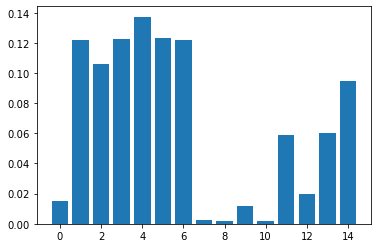

In [148]:
# plot
plt.bar(range(len(xgbc.feature_importances_)), xgbc.feature_importances_)
plt.show()

In [150]:
pd.DataFrame(X_train, y_train)

,sales_channel_id,product_group_name,graphical_appearance_name,colour_group_name,department_name,section_name,garment_group_name,FN,Active,club_member_status,fashion_news_frequency,Year,season,pricelabel,salelabel
article_id,,,,,,,,,,,,,,,
721511003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368979001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793949002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721990004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770211001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724906006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742947001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843793004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
pd.DataFrame(XGB_pred)

,0
0,658030005
1,705966002
2,673144002
3,708428003
4,590928022
...,...
31373,637283006
31374,704668001
31375,399223024
31376,770211001


# **LightGBM**

In [34]:
import lightgbm as lgb
modelL = lgb.LGBMClassifier(is_unbalance=True)
modelL.fit(X_train,y_train)

LGBMClassifier(is_unbalance=True)

In [35]:
from sklearn.metrics import accuracy_score
pred=modelL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.000946521533364884


In [18]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer

In [19]:
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier()

In [20]:
lgbmc.fit(X_train, y_train)
LGBM_pred=lgbmc.predict(X_test)
print(LGBM_pred)

[803772002 742916002 742916002 ... 742916002 803772002 742916002]


In [21]:
LGBMtrain_score=lgbmc.score(X_train, y_train)
print(LGBMtrain_score)

0.0011174359446277625


In [22]:
LGBMtest_score=lgbmc.score(X_test,y_test)
print('The Accuracy of LightGBM Classifier on testing set:', LGBMtest_score)

The Accuracy of LightGBM Classifier on testing set: 0.000946521533364884


In [ ]:
print(classification_report(y_test,LGBM_pred))
print(confusion_matrix(y_test,LGBM_pred))

# ***CatBOOST***


In [95]:
!pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [96]:
from catboost import CatBoostRegressor

# 建立模型
model = CatBoostRegressor(random_state=42,
                         loss_function='RMSE',
                         eval_metric='RMSE',
                         use_best_model=True)
# 使用訓練資料訓練模型
model.fit(X_train,y_train, eval_set=(X_test, y_test), verbose=0, plot=True)
model_pred=model.predict(X_test)
print(model_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[6.10650402e+08 6.80411028e+08 6.31439742e+08 ... 4.65527801e+08
 7.77742757e+08 5.36688542e+08]


In [97]:
model_score=model.score(X_train, y_train)
print(model_score)

0.7732792470844717


In [98]:
modely_score=model.score(X_test,y_test)
print('The Accuracy of CatBOOST Classifier on testing set:',modely_score)

The Accuracy of CatBOOST Classifier on testing set: 0.7583840670675709


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot') 
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold


In [25]:
CatBc = CatBoostClassifier(iterations=20,
  learning_rate=1,
  depth=2,
  loss_function='MultiClass')

In [26]:
CatBc.fit(X_train, y_train)
CatB_pred=CatBc.predict(X_test)
print(CatB_pred)

0:	learn: 9.6459827	total: 1m 14s	remaining: 23m 35s
1:	learn: 25.4214414	total: 2m 29s	remaining: 22m 24s
2:	learn: 40.3549544	total: 3m 43s	remaining: 21m 3s
3:	learn: 69.4209496	total: 4m 57s	remaining: 19m 51s
4:	learn: 92.3900697	total: 6m 12s	remaining: 18m 37s
5:	learn: 108.3385817	total: 7m 26s	remaining: 17m 21s
6:	learn: 126.0446685	total: 8m 41s	remaining: 16m 8s
7:	learn: 143.5705655	total: 9m 55s	remaining: 14m 53s
8:	learn: 155.8204190	total: 11m 15s	remaining: 13m 45s
9:	learn: 170.9864865	total: 12m 37s	remaining: 12m 37s
10:	learn: 183.3404721	total: 13m 53s	remaining: 11m 22s
11:	learn: 193.6471181	total: 15m 9s	remaining: 10m 6s
12:	learn: 201.4475831	total: 16m 25s	remaining: 8m 50s
13:	learn: 209.5420665	total: 17m 39s	remaining: 7m 34s
14:	learn: 216.3066756	total: 18m 53s	remaining: 6m 17s
15:	learn: 216.0810416	total: 20m 7s	remaining: 5m 1s
16:	learn: 224.4917405	total: 21m 21s	remaining: 3m 46s
17:	learn: 228.3392816	total: 22m 36s	remaining: 2m 30s
18:	learn:

In [27]:
CatBtrain_score=CatBc.score(X_train, y_train)
print(CatBtrain_score)

0.0


In [28]:
CatBest_score=CatBc.score(X_test,y_test)
print('The Accuracy of CatBOOST Classifier on testing set:',CatBest_score)

The Accuracy of CatBOOST Classifier on testing set: 0.0


In [ ]:
print(classification_report(y_test,CatB_pred))
print(confusion_matrix(y_test,CatB_pred))